# Titanic Project

the goal is to predict if somoene survived the titanic shipwreck

## Overview

1. Understand the shape of the data (Histograms, box plots, & etc)
2. Data Cleaning
3. Data Exploration
4. Feature Engineering
5. Data Preprocessing for Model
6. Basic model Building
7. Model tuning
8. Ensemble model building
9. Results

In [216]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file 
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
# Read the data

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

all_data = pd.concat([training, test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [218]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Project planning :

1. Understand nature of the data .info() .describe()

   a.Histograms and boxplots 
   
   b. Value counts 
   
   c.Missing data 

2. Correlation between the metrics 

3. Explore interesting themes 
    
    a. Wealthy survive? 
    
    b. By location 
    
    c. Age scatterplot with ticket price 
    
    d. Young and wealthy Variable? 
    
    e. Total spent? 

4. Feature engineering 

5. reprocess data together or use a transformer? 
    
    a. use label for train and test   

6. Scaling?

7. Model Baseline 

8. Model comparison with CV 

## Light Data Exploration

1. For Numeric data
- Made Histogram to understand the distribution
- Corrplot
- Pivot table comparing survival rate across numeric variables

2. For Categorical Data
- Made bar charts to understand balance of classes
- Made pivot table to understand relationship with survival

In [219]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [220]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [221]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [222]:
# look at num and cat separately
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

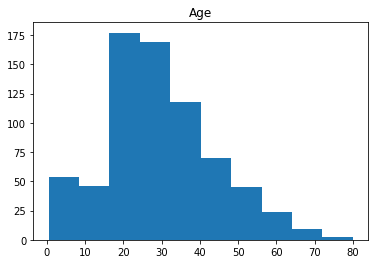

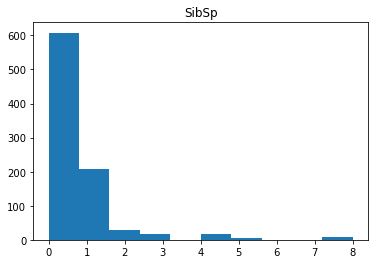

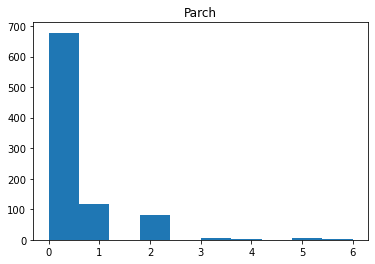

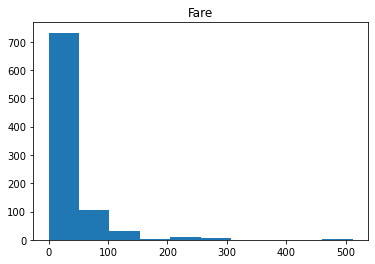

In [223]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

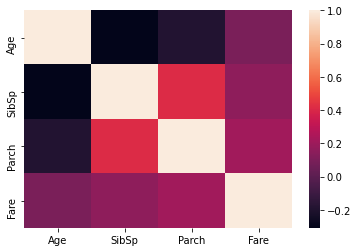

In [224]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [225]:
# Compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


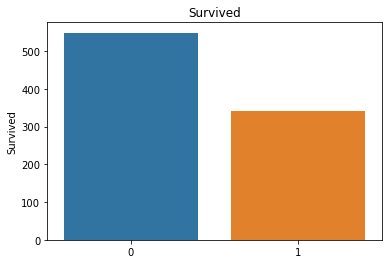

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


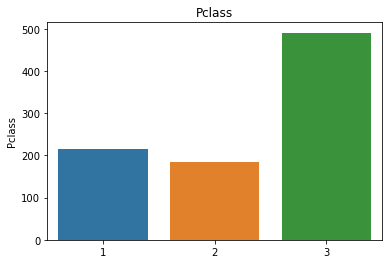

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


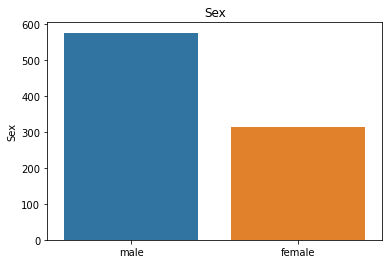

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


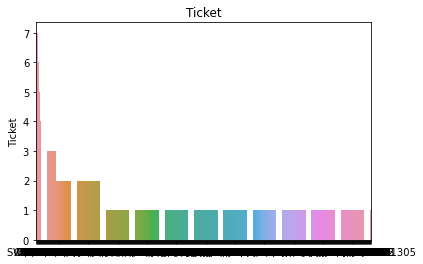

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


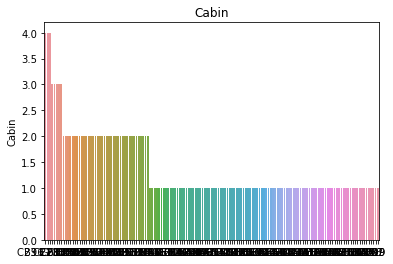

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


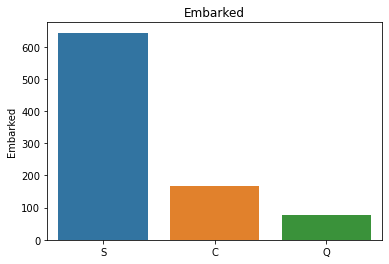

In [226]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [227]:
#Cabins and Ticket graph are messy


In [228]:
#Comparing survival and each of these categorical variable

print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Feature Engineering

In [229]:
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [230]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc = 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [231]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [232]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training, index = 'Survived', columns = 'cabin_adv', values = 'Name', aggfunc= 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [233]:
pd.DataFrame(training.Ticket)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [234]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [235]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0


In [236]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [237]:
pd.set_option('max_rows', None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
pp             3
sopp           3
wep            3
scah           2
ppp            2
swpp           2
sotono2        2
as             1
sop            1
scahbasle      1
fc             1
sp             1
scow           1
casoton        1
sca4           1
sc             1
fa             1
Name: ticket_letters, dtype: int64

In [238]:
pd.pivot_table(training, index ='Survived', columns= 'numeric_ticket', values = 'Ticket', aggfunc= 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [239]:
pd.pivot_table(training, index='Survived', columns= 'ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [240]:
training.Name.head(1)

0    Braund, Mr. Owen Harris
Name: Name, dtype: object

In [241]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [242]:
training.name_title.head(50)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
10      Miss
11      Miss
12        Mr
13        Mr
14      Miss
15       Mrs
16    Master
17        Mr
18       Mrs
19       Mrs
20        Mr
21        Mr
22      Miss
23        Mr
24      Miss
25       Mrs
26        Mr
27        Mr
28      Miss
29        Mr
30       Don
31       Mrs
32      Miss
33        Mr
34        Mr
35        Mr
36        Mr
37        Mr
38      Miss
39      Miss
40       Mrs
41       Mrs
42        Mr
43      Miss
44      Miss
45        Mr
46        Mr
47      Miss
48        Mr
49       Mrs
Name: name_title, dtype: object

In [243]:
training.name_title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Ms                1
Don               1
Capt              1
Lady              1
Jonkheer          1
Sir               1
Mme               1
Name: name_title, dtype: int64

## Data Preprocessing

1. drop null
2. select features
3. transform data using encoder
4. imputer
5. Normalize data using imbalance
6. scaling data using minmax

In [244]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [245]:
all_data.isna().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             2
train_test           0
cabin_multiple       0
cabin_adv            0
numeric_ticket       0
ticket_letters       0
name_title           0
dtype: int64

In [246]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


In [247]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test,cabin_multiple,numeric_ticket
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672,0.271963,0.734148
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394,0.574151,0.441955
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,4.000000,1.000000


In [248]:
categorical_features = all_data.columns[all_data.dtypes == object]
all_data[categorical_features].describe()

,Name,Sex,Ticket,Cabin,Embarked,cabin_adv,ticket_letters,name_title
count,1309,1309,1309,295,1307,1309,1309,1309
unique,1307,2,929,186,3,9,29,17
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,n,0,Mr
freq,2,843,11,6,914,1013,968,745


In [249]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

iterative imputer = Survived, age, Fare


ordinary = embarked strategy = most imputer


In [250]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [251]:
imp_mode = SimpleImputer(strategy='most_frequent')
all_data[['Survived']] = imp_mode.fit_transform(all_data[['Survived']]) #modus

In [252]:
imp_iter = IterativeImputer(max_iter=10, random_state = 0)
all_data[['Age', 'Fare']] = imp_iter.fit_transform(all_data[['Age', 'Fare']])

In [253]:
all_data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             2
train_test           0
cabin_multiple       0
cabin_adv            0
numeric_ticket       0
ticket_letters       0
name_title           0
dtype: int64

In [254]:
imp_const = SimpleImputer(strategy = 'constant', fill_value = 'S')
all_data[['Embarked']] = imp_const.fit_transform(all_data[['Embarked']])

In [255]:
all_data.isna().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             0
train_test           0
cabin_multiple       0
cabin_adv            0
numeric_ticket       0
ticket_letters       0
name_title           0
dtype: int64

In [256]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


preprocess scheme:
1. one hot encoding : sex, embarked, cabin_adv, name_title
1. binary encoding : ticket_letters

In [302]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [343]:
transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop = 'first'),['sex','embarked', 'cabin_adv', 'name_little']),
    ('binary encoder', ce.BinaryEncoder(),['ticket_letters'])
],remainder = 'passthrough')

## Data Splitting

In [344]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,NaN,S,1,0,n,0,a5,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.283300,C85,C,1,1,C,0,pc,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,NaN,S,1,0,n,0,stono2,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S,1,1,C,1,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,NaN,S,1,0,n,1,0,Mr
5,6,0.0,3,"Moran, Mr. James",male,28.610497,0,0,330877,8.458300,NaN,Q,1,0,n,1,0,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.862500,E46,S,1,1,E,1,0,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.075000,NaN,S,1,0,n,1,0,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.133300,NaN,S,1,0,n,1,0,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.070800,NaN,C,1,0,n,1,0,Mrs


## Data Splitting

In [353]:
X = all_data.drop(columns = ['Survived'])
y = all_data['Survived']

In [354]:
from sklearn.model_selection import train_test_split # data splitting

In [355]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 2020)

In [356]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr
360,361,3,"Skoog, Mr. Wilhelm",male,40.000000,1,4,347088,27.9000,NaN,S,1,0,n,1,0,Mr
363,1255,3,"Strilic, Mr. Ivan",male,27.000000,0,0,315083,8.6625,NaN,S,0,0,n,0,sotonoq,Mr
718,719,3,"McEvoy, Mr. Michael",male,28.927267,0,0,36568,15.5000,NaN,Q,1,0,n,1,0,Mr
87,88,3,"Slocovski, Mr. Selman Francis",male,28.592130,0,0,SOTON/OQ 392086,8.0500,NaN,S,1,0,n,0,sotonoq,Mr


In [357]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
406,407,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S,1,0,n,1,0,Mr
595,596,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S,1,0,n,1,0,Mr
687,688,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S,1,0,n,1,0,Mr
619,620,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S,1,0,n,1,0,Mr
44,45,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,1,0,n,1,0,Miss


In [358]:
X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

ValueError: A given column is not a column of the dataframe